In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

# Constantes
k=0.5;h=20;Cv=1000;rho=2000
Ta=-10; Ti=20 #[oC]
L = 0.3
dL=0.05; 
q=2000; # W/m^3;


# Méthode de Derivation
xi=0.5
# Condition de Neumann à x=L (face interne du mur): dT/dx=0 - flux net de chaleur est 0
c1=-k; c2=h; c3=-h*Ta
d1=k; d2=h; d3=-h*Ti

# Conditions initiales
Al = (Ti-Ta)/(2*k/h+L)
Bl= ((Ti+Ta)*k/h+Ta*L)/(2*k/h+L)

#Grille en x
dx=0.003
N = int(L/dx)
x=np.linspace(0,L,N+1)


#Initialisation des matrices
S=np.zeros(N+1,dtype=np.double)
A=np.zeros((N+1,N+1),dtype=np.double)
b=np.zeros(N+1,dtype=np.double)
u=np.zeros(N+1,dtype=np.double)
M = np.eye(N+1); 
M[0,0]=0; M[N,N]=0

#Fonctions sources et initiales
S=q/(1+((x-L)/dL)**2)
u0=Al*x+Bl

#Définition des matrices
A=np.diag(-2*np.ones(N+1),0)+np.diag(np.ones(N),-1)+np.diag(np.ones(N),1)
A[0,0]=2*c2*dx-3*c1;A[0,1]=4*c1;A[0,2]=-c1
A[N,N]=3*d1+2*d2*dx;A[N,N-1]=-4*d1;A[N,N-2]=d1
b=-S/k*dx**2; b[0]=-2*c3*dx; b[N]=-2*d3*dx



#Résolution du problème en position
u_eq=np.linalg.solve(A,b)
T_eqMax = np.max(u_eq)
x_max = x[np.argmax(u_eq)]


# Résolution temporelle
alpha = Cv*rho/k
dt=dx**2*alpha
up = u0
maxtime= 10**6 # (s)
n_iterations = int(maxtime/dt)
T_max = np.zeros(n_iterations+1, dtype=float)
t_lin = np.zeros(n_iterations+1, dtype=float)
t_lin[0] = 0
T_max[0] = np.max(u0)
trouve=False
for p in range(n_iterations):
    t=(p+1)*dt
    Ap = M-dt/(alpha*dx**2)*xi*A
    bp = ((M+dt/(alpha*dx**2)*(1-xi)*A)@up) -dt/(alpha*dx**2)*b
    up1 = np.linalg.solve(Ap,bp)    
    up = up1
    t_lin[p+1]=t
    T_max[p+1]=np.max(up1)
    if np.max(up) >= np.max(u0)+0.95*(T_eqMax-np.max(u0)) and trouve == False:
        tau_eq=t
        T_eq=np.max(up1)
        trouve=True
    p=p+1



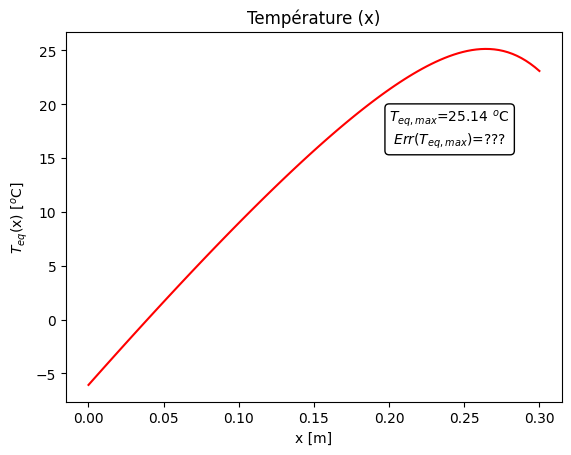

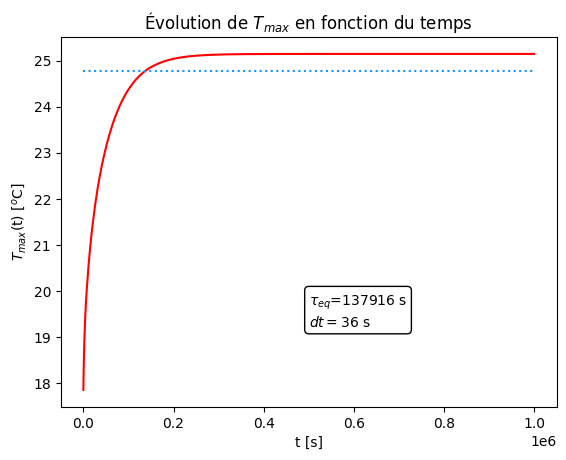

In [2]:
# Graphs

plt.figure(1)
plt.plot(x, u_eq, color='red')
plt.title('Température (x)')
plt.text(0.2, u_eq[int(N/2)], f'$T_{{eq,max}}$={T_eqMax:.2f} $^o$C \n $Err(T_{{eq,max}})$=???', ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.xlabel('x [m]')    
plt.ylabel('$T_{eq}$(x) [$^o$C]')

plt.figure(4)
plt.title('Évolution de $T_{max}$ en fonction du temps')
plt.xlabel('t [s]')
plt.ylabel('$T_{max}$(t) [$^o$C]')
plt.plot(t_lin, T_max, color='red', label='$T_{max}(t)$')
# plt.text(0.5e6, T_max[int(5*N/6)], fr'$\tau_{{eq}}$={tau_eq:.0f} s \\ $dt={dt:.0f}$ s', ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.text(0.5e6, T_max[int(5*N/6)], fr'$\tau_{{eq}}$={tau_eq:.0f} s'+f'\n$dt={dt:.0f}$ s',
         ha='left', va='bottom', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.hlines(T_eq, xmin=t_lin[0], xmax=t_lin[n_iterations], linestyles='dotted', color='dodgerblue', label=fr'T_{{max}}($\tau_{{eq}}$)')
# plt.plot(x,up, label='Finale')
# plt.plot(x,u0, label='Initiale')
plt.show()

# print(f"Température Max à l'équilibre : {T_eqMax}")
# print(f"Pas de temps : {dt}")